In [40]:
import pandas as pd
import numpy as np
from pandas import DataFrame as DF
from collections import Counter
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import math

In [2]:
data = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
test_pairs = test[['source', 'target']].values
data.head()

,video_id,uploader,age,category,length,views,rate,ratings,comments,1,...,11,12,13,14,15,16,17,18,19,20
0,LKh7zAJ4nwo,TheReceptionist,653.0,Entertainment,424.0,13021.0,4.34,1305.0,744.0,NaN,...,DjdA-5oKYFQ,vmdPOOd6cxI,uX81lMev6_o,NaN,W1Uo5DQTtzc,heqocRij5P0,2ZgXx72XmoE,1tUDzOp10pk,DH56yrIO5nI,E-3zXq_r4w0
1,7D0Mf4Kn4Xk,periurban,583.0,Music,201.0,6508.0,4.19,687.0,312.0,AvSK0qPw7EU,...,e2k0h6tPvGc,NaN,VKFqqoeMdjw,NSzrwv5MCwc,y3IDp2n7B48,N1lkLaLJHlc,NHB0a0xtLgU,Eq4hGkIqBGw,bdDskrr8jRY,JngPWhfCb2M
2,n1cEq1C8oqQ,Pipistrello,525.0,Comedy,125.0,1687.0,4.01,363.0,141.0,YfShxdbAJS8,...,eprHhmurMHg,yLup8wjbSIo,z5wDjq8o60c,bWlPSLUT-6U,bSPVayE0NhE,F2_5KOnSsfI,dsBTo5LExr0,gnpvEvuiFoQ,3nH5Tccz8EQ,sEqCkwPmQ_w
3,OHkEzL4Unck,ichannel,638.0,Comedy,299.0,8043.0,4.40,518.0,371.0,NaN,...,eyUSTmEUQRg,LQUV_XGzHmA,nfBfC8bif1Y,aiYwo5K0VWg,N4EYgXReBzM,FMuWYExDEJk,Ml2NaXU6gms,DVNwUKAuB3I,mDjwzhc8dQ0,NyC_0Z6zoUk
4,-boOvAGNKUc,mrpitifulband,639.0,Music,287.0,7548.0,4.48,606.0,386.0,JsdCu9T47iY,...,fmUwUURgsX0,eV2SdBITv8k,sf-Ym_pFP6U,0vhVZQEzgcU,lhWk9SXUjWI,geiABCqmQ84,dDhCZVQf9po,RZo5MisSTWo,saBmFpuwmKA,aVhSaa6aAOg


In [3]:
Counter(data['category'].values).most_common

<bound method Counter.most_common of Counter({'Music': 5375, 'Entertainment': 4557, 'Comedy': 4443, 'Film & Animation': 2953, 'People & Blogs': 2208, 'News & Politics': 2070, 'Sports': 1710, 'Gadgets & Games': 1455, 'Howto & DIY': 642, 'Travel & Places': 430, 'Pets & Animals': 347, 'Autos & Vehicles': 303, ' UNA ': 296, nan: 112})>

In [4]:
video_set = data['video_id'].values
video_list = data['video_id'].values.reshape(-1,1)

for i in range(1,21,1):
    video_set = np.concatenate((video_set,data[str(i)].values),axis=0)
    video_list = np.concatenate((video_list,data[str(i)].values.reshape(-1,1)),axis=1)

In [47]:
g= nx.Graph()
g.add_nodes_from(list(set(video_set))[1:])

In [50]:
edge_pairs1 = []
for row in video_list:
    for i in range(20):
        try:
            math.isnan(row[i+1])
        except:
            edge_pairs1.append((row[0], row[i+1]))
            
g.add_edges_from(edge_pairs1)

In [74]:
len(set(video_set))

218344

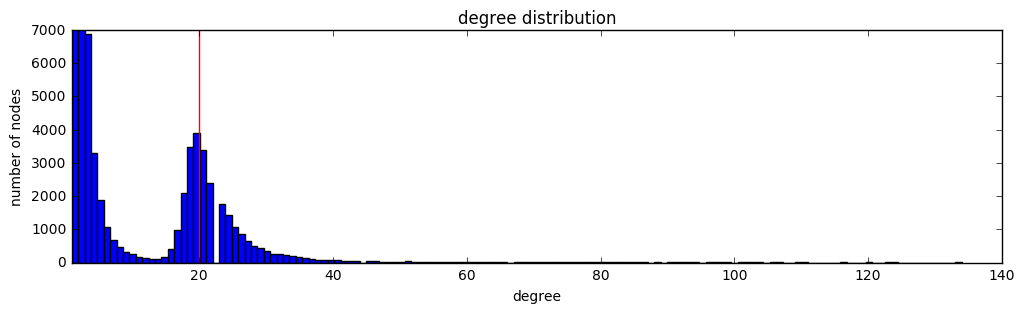

In [67]:
plt.figure(figsize=(12,3))
plt.hist(sorted(nx.degree(g).values(),reverse=True),140)
plt.title('degree distribution')
plt.axvline(20,c='r')
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.xlim(1,140)
plt.ylim(0,7000)
plt.savefig('dagree distribution.png')
plt.show()

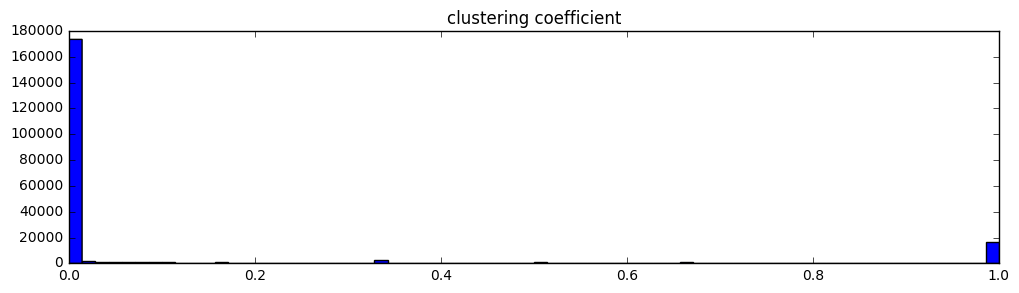

In [68]:
plt.figure(figsize=(12,3))
plt.hist(list(nx.clustering(g).values()),70)
plt.title('clustering coefficient')
plt.savefig('clustering coefficient.png')
plt.show()

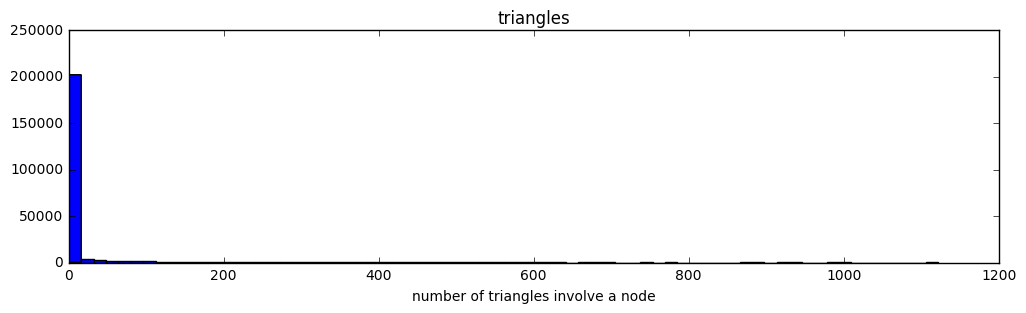

In [69]:
plt.figure(figsize=(12,3))
plt.hist(list(nx.triangles(g).values()),70)
plt.title('triangles')
plt.xlabel('number of triangles involve a node')
plt.savefig('triangle.png')
plt.show()

In [53]:
hashmap_video = {}; hashmap_cate = {}; hashmap_sim = {}; ind1=0; ind2=0
parent_video = data['video_id'].values
parent_video_set = set(parent_video)
for index, row in data.iterrows():
    hashmap_video[row['video_id']] = {'category': row['category'],'index':ind2}
    try:
        hashmap_cate[row['category']].append(row['video_id'])
    except:
        hashmap_cate[row['category']] = []
        hashmap_cate[row['category']].append(row['video_id'])
        hashmap_sim[row['category']] = ind1
        ind1 += 1
    ind2+=1

In [55]:
true_edges = []

same_cate= []
cate_pair_ct = np.zeros((14,14))

# form edge pair
import math
for index0, row in enumerate(video_list):
    for i in range(20):
        try:
            math.isnan(row[i+1])
        except:
            if row[i+1] in parent_video_set:
                true_edges.append((row[0], row[i+1]))
                
                if hashmap_video[row[0]]['category'] == hashmap_video[row[i+1]]['category']:
                    same_cate.append(1)
                else: same_cate.append(0)
                    
                cate_pair_ct[hashmap_sim[hashmap_video[row[0]]['category']],hashmap_sim[hashmap_video[row[i+1]]['category']]]+=1

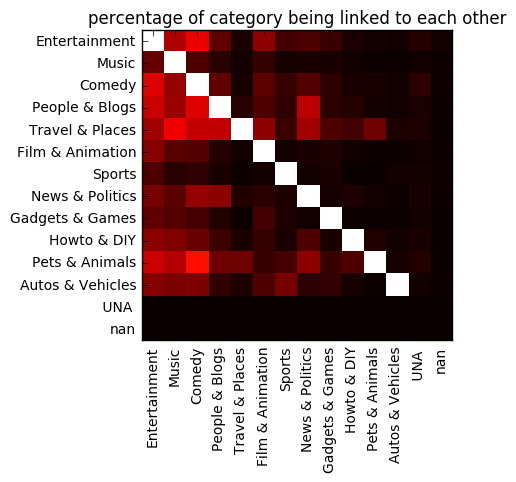

In [71]:
import operator
sorted_x = sorted(hashmap_sim.items(), key=operator.itemgetter(1))

cate_norm = np.zeros((14,14))
for index, row in enumerate(cate_pair_ct):
    if max(row)==0:
        cate_norm[index,:] = 0
    else:
        cate_norm[index,:] = cate_pair_ct[index,:]/max(row)
    
plt.imshow(cate_norm, cmap='hot', interpolation='nearest')
plt.title('percentage of category being linked to each other')
plt.xticks(list(range(14)),list(np.array(sorted_x)[:,0]),rotation=90)
plt.yticks(list(range(14)),list(np.array(sorted_x)[:,0]))
plt.savefig('category links 1.png')
plt.show()

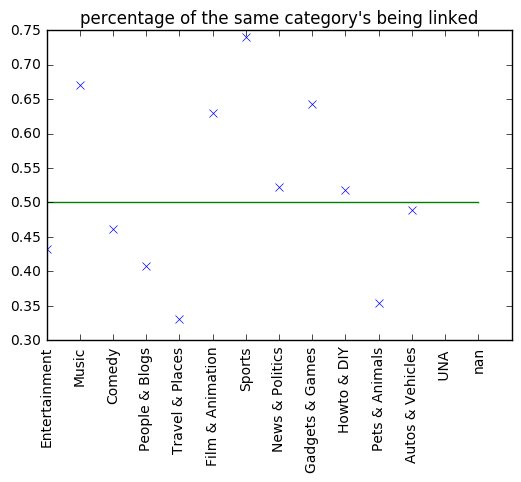

In [72]:
cate_perc = np.zeros(14)
for index, row in enumerate(cate_pair_ct):
    cate_perc[index] = cate_pair_ct[index,index]/sum(row)

plt.plot(cate_perc,'x')
plt.plot(np.ones(14)*0.5)
plt.title('percentage of the same category\'s being linked')
plt.xticks(list(range(14)),list(np.array(sorted_x)[:,0]),rotation=90)
plt.savefig('category links 2.png')
plt.show()